<a href="https://colab.research.google.com/github/RTae/CPE213/blob/main/week7/CPE231_Lecture6_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network representation

## Create a graph matrix

In [2]:
A <- rbind(c(0,1,0), c(1,0,1), c(1,0,0))
nodeNames <- c("A","B","C")
dimnames(A) <- list(nodeNames, nodeNames)
A

A B C
A 0 1 0
B 1 0 1
C 1 0 0

## Matrix multiplication. Number of paths of length 2

In [3]:
A %*% A

A B C
A 1 0 1
B 1 1 0
C 0 1 0

## Matrix multiplication. Number of paths of length 4

In [4]:
A %*% A %*% A %*% A

A B C
A 1 1 1
B 2 1 1
C 1 1 0

## Graph as edge list representation

In [5]:
el <- rbind(c("A","B"), c("B","A"), c("B","C"), c("C","A"))
el

[,1] [,2]
[1,] A    B   
[2,] B    A   
[3,] B    C   
[4,] C    A

## Representation with igraph

In [6]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




IGRAPH a0ca660 DN-- 3 2 -- 
+ attr: name (v/c)
+ edges from a0ca660 (vertex names):
[1] B->C C->A

In [11]:
g <- graph_from_literal(A--B, B-+C, C-+A)
g

IGRAPH 565e476 DN-- 3 2 -- 
+ attr: name (v/c)
+ edges from 565e476 (vertex names):
[1] B->C C->A

## Graph from edge list

In [7]:
g <- graph_from_edgelist(el, directed=TRUE)
g

IGRAPH 9b318e4 DN-- 3 4 -- 
+ attr: name (v/c)
+ edges from 9b318e4 (vertex names):
[1] A->B B->A B->C C->A

## Graph from data frame

In [8]:
df <- as.data.frame(el)
g <- graph_from_data_frame(df, directed=TRUE)
g

IGRAPH 3c607b8 DN-- 3 4 -- 
+ attr: name (v/c)
+ edges from 3c607b8 (vertex names):
[1] A->B B->A B->C C->A

## Graph from adjacency matrix

In [9]:
g <- graph_from_adjacency_matrix(A)
g


IGRAPH 27aa520 DN-- 3 4 -- 
+ attr: name (v/c)
+ edges from 27aa520 (vertex names):
[1] A->B B->A B->C C->A

# Standard structure

## Trees 

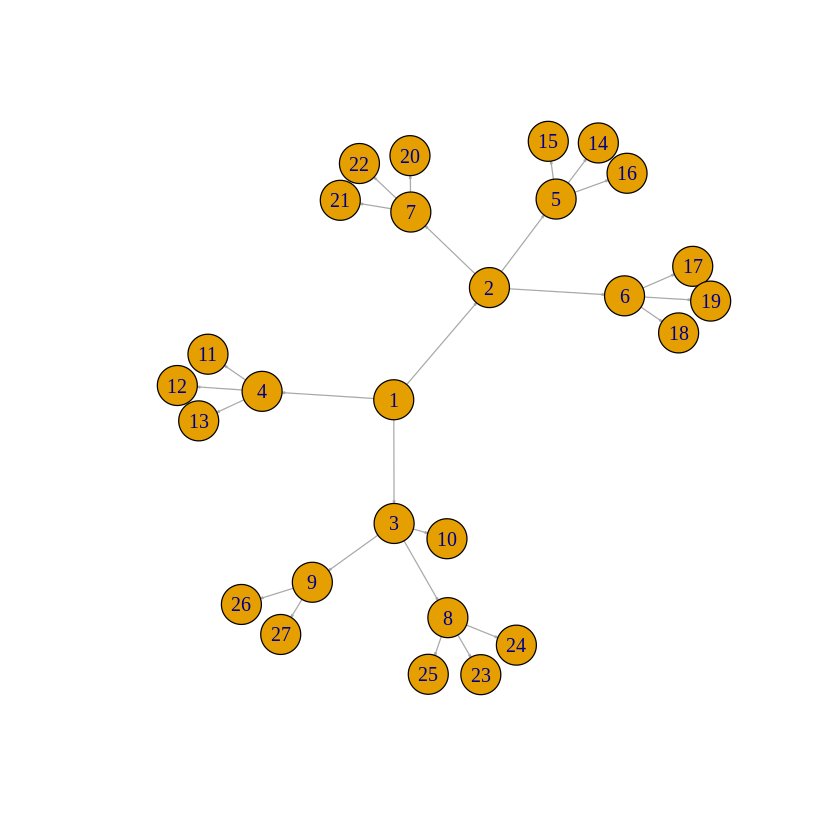

In [12]:
g <- make_tree(27, children = 3)
plot(g, edge.arrow.size=0.1)


## Complete graphs

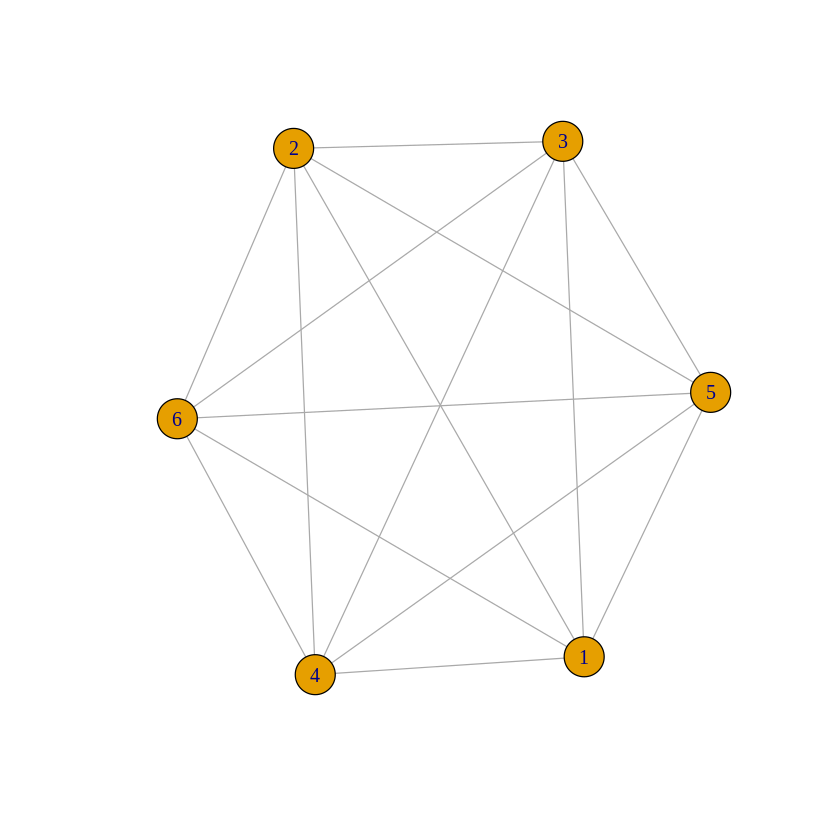

In [13]:
g <- make_full_graph(n = 6)
plot(g, edge.arrow.size=0.1)

## Lattice

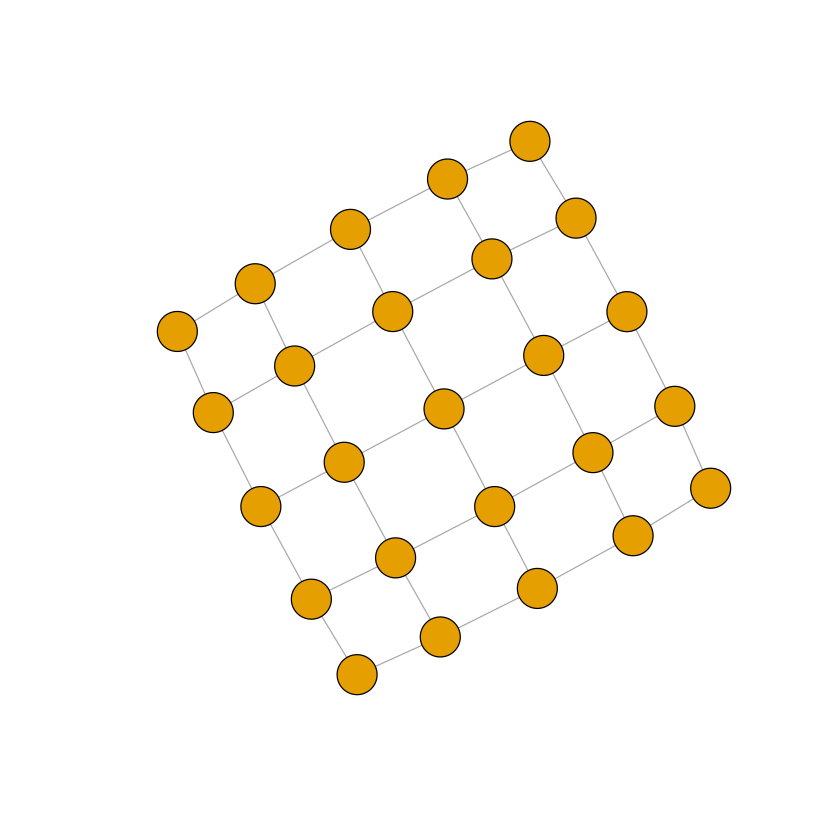

In [14]:
g <- make_lattice(dimvector = c(5,5),
                  circular = FALSE)
V(g)$label <- NA
plot(g, edge.arrow.size=0.1)

## Star

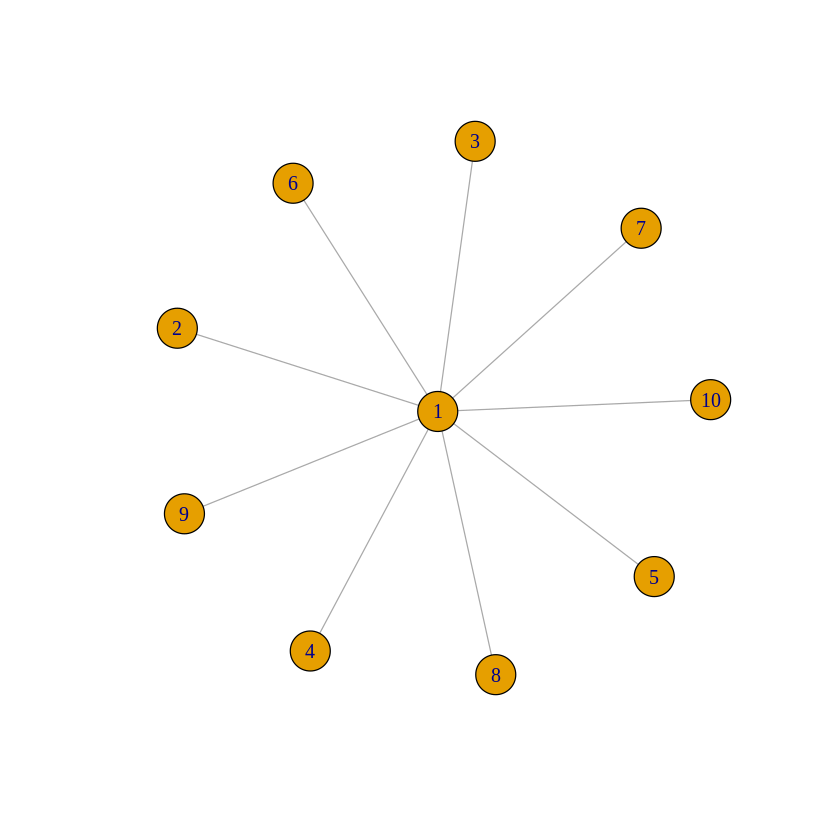

In [15]:
g <- make_star(n=10, mode = "undirected")
plot(g, edge.arrow.size=0.1)

## Exercise 1

From To     
1 CCL  Double 
2 DN16 Feather
3 DN21 Feather
4 Beak Fish

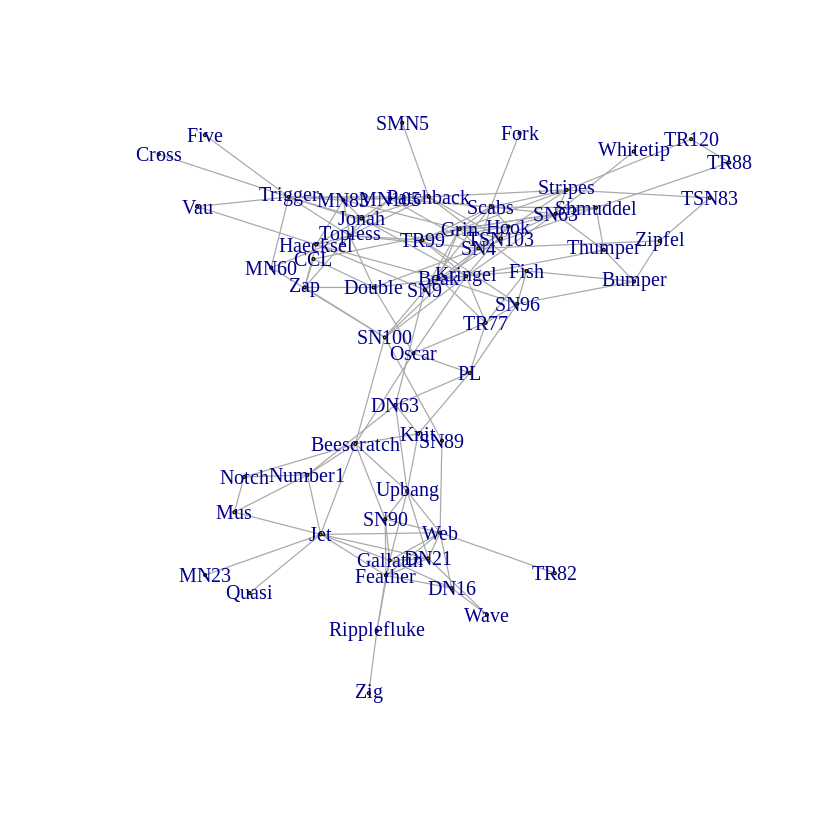

In [16]:
# List edge
dolphinEdges <- read.csv("dolphin_edges.csv")
head(dolphinEdges, n=4)
dolphin <- graph_from_data_frame(dolphinEdges, directed = FALSE)
plot(dolphin, vertex.size=1, edge.arrow.size=0.1)

Name       Gender
1 Beak       Male  
2 Beescratch Male  
3 Bumper     Male  
4 CCL        Female

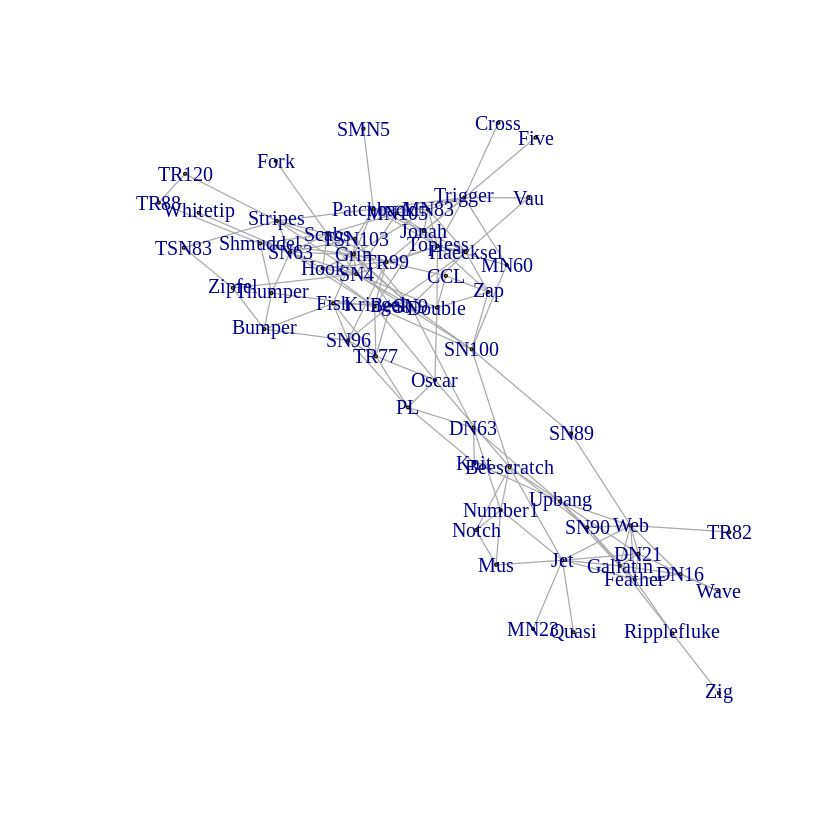

In [17]:
# List vertex
dolphinVertices <- read.csv("dolphin_vertices.csv")
head(dolphinVertices, n = 4)
dolphin <- graph_from_data_frame(dolphinEdges, vertices = dolphinVertices, directed = FALSE)
plot(dolphin, vertex.size=1, edge.arrow.size=0.1)

In [18]:

write_graph(dolphin, "dolphin.graphml", format="graphml")

# Network Manipulation

## Import data

In [19]:
install.packages("igraphdata")
library(igraphdata)
data("USairports")
graph_attr(USairports)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



$name
[1] "US airports"

## Vertext attributes

In [20]:
vertex_attr_names(USairports)
vertex_attr(USairports, "City")

[1] "name"     "City"     "Position"

[1] "Bangor, ME"                      "Boston, MA"                     
  [3] "Anchorage, AK"                   "New York, NY"                   
  [5] "Las Vegas, NV"                   "Miami, FL"                      
  [7] "Newark, NJ"                      "Broomfield, CO"                 
  [9] "Teterboro, NJ"                   "Los Angeles, CA"                
 [11] "Alexandria, LA"                  "Seattle, WA"                    
 [13] "Elmira/Corning, NY"              "Spokane, WA"                    
 [15] "Wichita, KS"                     "West Palm Beach/Palm Beach, FL" 
 [17] "Pittsburgh, PA"                  "San Francisco, CA"              
 [19] "Victoria, TX"                    "Washington, DC"                 
 [21] "Allentown/Bethlehem/Easton, PA"  "Augusta, GA"                    
 [23] "Asheville, NC"                   "Scranton/Wilkes-Barre, PA"      
 [25] "Hartford, CT"                    "Birmingham, AL"                 
 [27] "Nashville, TN"                   "Baton Rouge, LA"                
 [29] "Buffalo, NY"                     "Baltimore, MD"                  
 [31] "Columbia, SC"                    "Akron, OH"                      
 [33] "Chattanooga, TN"                 "Charlottesville, VA"            
 [35] "Charleston, SC"                  "Cleveland, OH"                  
 [37] "Charlotte, NC"                   "Columbus, OH"                   
 [39] "Charleston/Dunbar, WV"           "Cincinnati, OH"                 
 [41] "Daytona Beach, FL"               "Dayton, OH"                     
 [43] "Washington, DC"                  "Detroit, MI"                    
 [45] "New Bern/Morehead/Beaufort, NC"  "Fayetteville, NC"               
 [47] "Gainesville, FL"                 "Gulfport/Biloxi, MS"            
 [49] "Greensboro/High Point, NC"       "Greenville/Spartanburg, SC"     
 [51] "White Plains, NY"                "Huntsville, AL"                 
 [53] "Wilmington, NC"                  "Indianapolis, IN"               
 [55] "Jackson/Vicksburg, MS"           "Lexington, KY"                  
 [57] "New York, NY"                    "Little Rock, AR"                
 [59] "Harrisburg, PA"                  "Montgomery, AL"                 
 [61] "Milwaukee, WI"                   "Melbourne, FL"                  
 [63] "Mobile, AL"                      "Minneapolis, MN"                
 [65] "New Orleans, LA"                 "Myrtle Beach, SC"               
 [67] "Jacksonville/Camp Lejeune, NC"   "Norfolk, VA"                    
 [69] "Greenville, NC"                  "Newport News/Williamsburg, VA"  
 [71] "Philadelphia, PA"                "Pensacola, FL"                  
 [73] "Portland, ME"                    "Raleigh/Durham, NC"             
 [75] "Richmond, VA"                    "Roanoke, VA"                    
 [77] "Savannah, GA"                    "Louisville, KY"                 
 [79] "Sarasota/Bradenton, FL"          "St. Louis, MO"                  
 [81] "Syracuse, NY"                    "Tallahassee, FL"                
 [83] "Bristol/Kngsprt/Jhnsn Cty, TN"   "Knoxville, TN"                  
 [85] "Valparaiso, FL"                  "Fayetteville, AR"               
 [87] "Albany, NY"                      "Binghamton/Endct/Jhnsn Cty, NY" 
 [89] "Burlington, VT"                  "Erie, PA"                       
 [91] "Florence, SC"                    "Hilton Head, SC"                
 [93] "Ashland, WV"                     "New Haven, CT"                  
 [95] "Williamsport, PA"                "Islip, NY"                      
 [97] "Ithaca/Cortland, NY"             "Lynchburg, VA"                  
 [99] "Manchester, NH"                  "Providence, RI"                 
[101] "Rochester, NY"                   "Salisbury, MD"                  
[103] "State College, PA"               "Newburgh/Poughkeepsie, NY"      
[105] "Bradford, PA"                    "Du Bois, PA"                    
[107] "Key West, FL"                    "Franklin/Oil City, PA"          
[109] 

## Edges attributes

In [21]:
edge_attr_names(USairports)
edge_attr(USairports, "Carrier")

[1] "Carrier"    "Departures" "Seats"      "Passengers" "Aircraft"  
[6] "Distance"

[1] "British Airways Plc"                                                         
    [2] "British Airways Plc"                                                         
    [3] "British Airways Plc"                                                         
    [4] "China Airlines Ltd."                                                         
    [5] "China Airlines Ltd."                                                         
    [6] "Korean Air Lines Co. Ltd."                                                   
    [7] "Lan Ecuador"                                                                 
    [8] "Eva Airways Corporation"                                                     
    [9] "G5 Executive Ag"                                                             
   [10] "G5 Executive Ag"                                                             
   [11] "G5 Executive Ag"                                                             
   [12] "Qantas Airways Ltd."                                                         
   [13] "Qantas Airways Ltd."                                                         
   [14] "Cathay Pacific Airways Ltd."                                                 
   [15] "London Air Services Limited"                                                 
   [16] "London Air Services Limited"                                                 
   [17] "London Air Services Limited"                                                 
   [18] "London Air Services Limited"                                                 
   [19] "London Air Services Limited"                                                 
   [20] "London Air Services Limited"                                                 
   [21] "London Air Services Limited"                                                 
   [22] "London Air Services Limited"                                                 
   [23] "London Air Services Limited"                                                 
   [24] "London Air Services Limited"                                                 
   [25] "London Air Services Limited"                                                 
   [26] "London Air Services Limited"                                                 
   [27] "London Air Services Limited"                                                 
   [28] "London Air Services Limited"                                                 
   [29] "Virgin Atlantic Airways"                                                     
   [30] "PSA Airlines Inc."                                                           
   [31] "PSA Airlines Inc."                                                           
   [32] "PSA Airlines Inc."                                                           
   [33] "PSA Airlines Inc."                                                           
   [34] "PSA Airlines Inc."                                                           
   [35] "PSA Airlines Inc."                                                           
   [36] "PSA Airlines Inc."                                                           
   [37] "PSA Airlines Inc."                                                           
   [38] "PSA Airlines Inc."                                                           
   [39] "PSA Airlines Inc."                                                           
   [40] "PSA Airlines Inc."                                                           
   [41] "PSA Airlines Inc."                                                           
   [42] "PSA Airlines Inc."                                                           
   [43] "PSA Airlines Inc."                                                           
   [44] "PSA Airlines Inc."                                                           
   [45] "PSA Airlines Inc."                                                           
   [46] "PSA Airlines Inc."                                                           
  

## Sequence

In [22]:
V(USairports)[1:5] # subset by index
V(USairports)["JFK"] # subset by name
V(USairports)[["JFK"]] # access all attributes

+ 5/755 vertices, named, from bf6202d:
[1] BGR BOS ANC JFK LAS

+ 1/755 vertex, named, from bf6202d:
[1] JFK

+ 1/755 vertex, named, from bf6202d:
  name         City         Position
4  JFK New York, NY N403823 W0734644

## Adding attributes

In [23]:
V(USairports)[1:5]$City # access attributes
# add new attributes
V(USairports)$Group <- sample(c("A","B"), vcount(USairports), replace = TRUE)
V(USairports)[[1:5]]

[1] "Bangor, ME"    "Boston, MA"    "Anchorage, AK" "New York, NY" 
[5] "Las Vegas, NV"

+ 5/755 vertices, named, from bf6202d:
  name          City         Position Group
1  BGR    Bangor, ME N444827 W0684941     A
2  BOS    Boston, MA N422152 W0710019     A
3  ANC Anchorage, AK N611028 W1495947     A
4  JFK  New York, NY N403823 W0734644     A
5  LAS Las Vegas, NV N360449 W1150908     A

## Edge selector

In [24]:
E(USairports)["JFK" %--% "BOS"] # edges in both direction
# all carriers from JFK to BOS
unique(E(USairports)["JFK" %--% "BOS"]$Carrier)

+ 26/23473 edges from bf6202d (vertex names):
 [1] BOS->JFK BOS->JFK JFK->BOS JFK->BOS BOS->JFK JFK->BOS BOS->JFK JFK->BOS
 [9] BOS->JFK BOS->JFK BOS->JFK BOS->JFK BOS->JFK JFK->BOS JFK->BOS JFK->BOS
[17] JFK->BOS BOS->JFK JFK->BOS BOS->JFK BOS->JFK JFK->BOS JFK->BOS BOS->JFK
[25] JFK->BOS BOS->JFK

[1] "JetBlue Airways"              "Compass Airlines"            
[3] "Pinnacle Airlines Inc."       "Delta Air Lines Inc."        
[5] "Comair Inc."                  "Atlantic Southeast Airlines" 
[7] "American Eagle Airlines Inc." "Chautauqua Airlines Inc."    
[9] "Lufthansa German Airlines"

## Edges between groups

In [25]:
inCal <- grepl("CA$", V(USairports)$City)
inNy <- grepl("NY$", V(USairports)$City)
# Edges from CA to NY
E(USairports)[V(USairports)[inCal] %->% V(USairports)[inNy]]

+ 35/23473 edges from bf6202d (vertex names):
 [1] LAX->JFK LAX->JFK LAX->JFK LAX->JFK SAN->JFK SFO->JFK SFO->JFK SFO->JFK
 [9] BUR->JFK LAX->JFK LGB->JFK OAK->JFK SAN->JFK SFO->JFK SJC->JFK SMF->JFK
[17] LAX->JFK LAX->JFK LAX->JFK SAN->JFK SAN->JFK SFO->JFK SFO->JFK SNA->JFK
[25] LAX->ALB LAX->JFK LAX->JFK SFO->JFK SFO->JFK SFO->JFK BUR->FRG LAX->JFK
[33] LAX->JFK SFO->JFK SFO->JFK

## Exercise 2

In [27]:
table(V(dolphin)$Gender)


 Female    Male Unknown 
     25      33       4 

In [42]:
E(dolphin)$weight = 1

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1

In [44]:
dolphin

IGRAPH 47f6d52 UNW- 62 159 -- 
+ attr: name (v/c), Gender (v/c), weight (e/n)
+ edges from 47f6d52 (vertex names):
 [1] CCL       --Double   DN16      --Feather  DN21      --Feather 
 [4] Beak      --Fish     Bumper    --Fish     DN16      --Gallatin
 [7] DN21      --Gallatin Feather   --Gallatin Beak      --Grin    
[10] CCL       --Grin     Beak      --Haecksel Grin      --Hook    
[13] Beescratch--Jet      DN21      --Jet      Feather   --Jet     
[16] Gallatin  --Jet      Haecksel  --Jonah    Beescratch--Knit    
[19] DN63      --Knit     Double    --Kringel  Hook      --Kringel 
[22] Jonah     --Kringel  Jonah     --MN105    Jet       --MN23    
+ ... omitted several edges

## Induced subgraph

In [31]:
calAirports <- induced_subgraph(USairports, inCal)
calAirports

IGRAPH af72637 DN-- 34 381 -- US airports
+ attr: name (g/c), name (v/c), City (v/c), Position (v/c), Group
| (v/c), Carrier (e/c), Departures (e/n), Seats (e/n), Passengers
| (e/n), Aircraft (e/n), Distance (e/n)
+ edges from af72637 (vertex names):
 [1] LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO
 [9] LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO LAX->SFO
[17] LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN
[25] LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SAN LAX->SMF LAX->SMF
[33] LAX->SMF LAX->SMF LAX->SMF LAX->SMF LAX->SMF LAX->SNA LAX->BUR LAX->OAK
[41] LAX->OAK LAX->OAK LAX->OAK LAX->OAK LAX->ONT LAX->ONT LAX->SJC LAX->SJC
+ ... omitted several edges

## Neighbourhoods

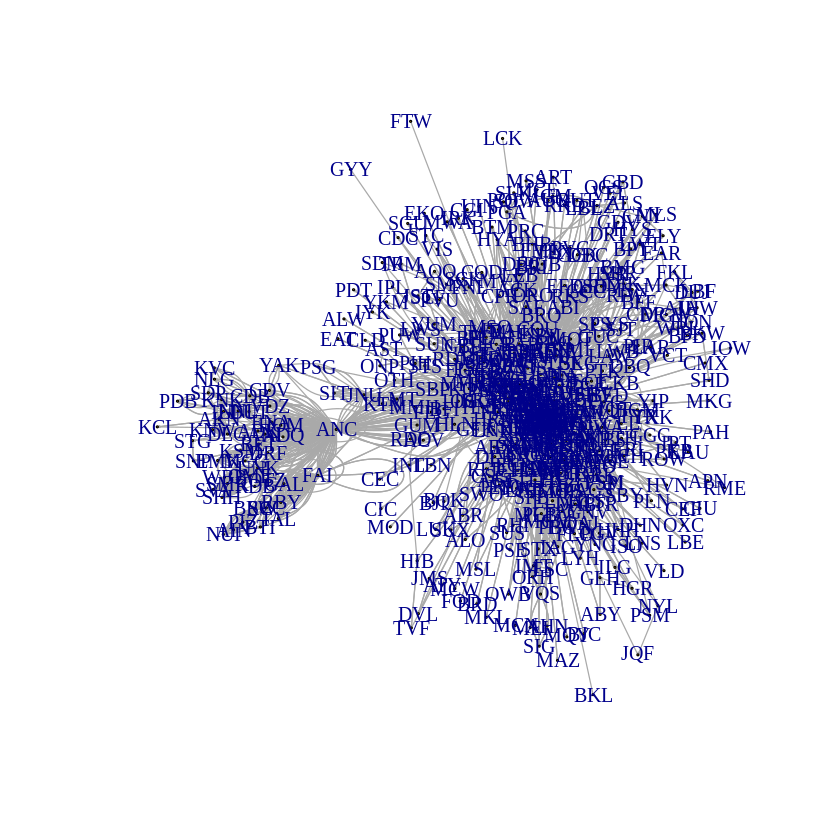

In [32]:
# neighbor within 2 vertices from JFK or LAX
d2Vertices <- ego(USairports, nodes = c("JFK","LAX"), order = 2)
# neighor as graphs
JFKNet <- make_ego_graph(USairports, nodes = "JFK", order = 2)[[1]]
plot(JFKNet, vertex.size=0, edge.arrow.size=0.1)

## Adding

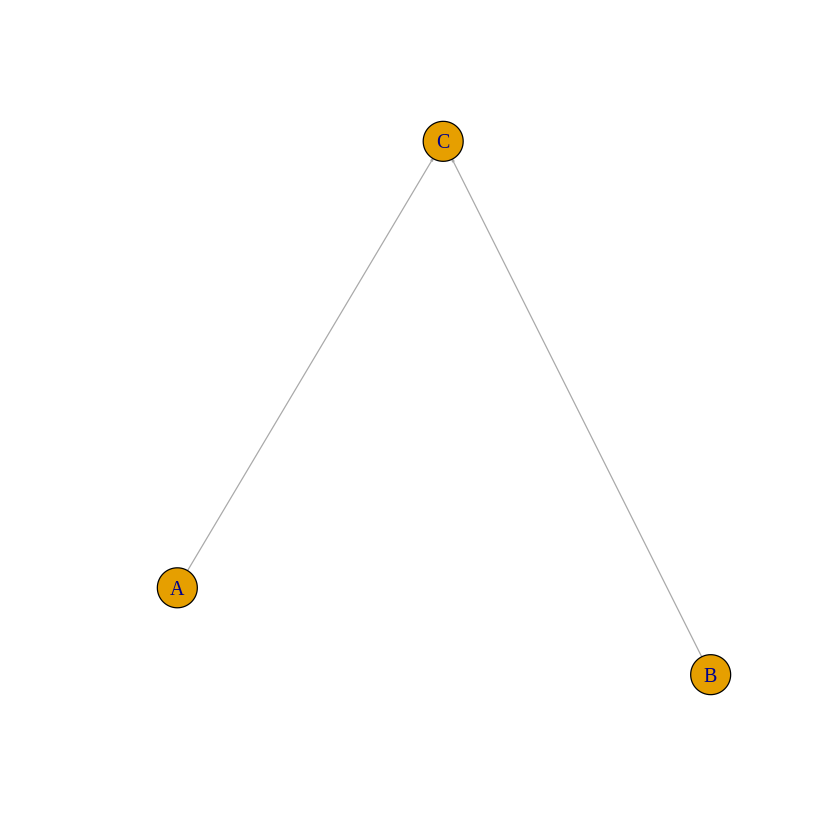

In [33]:
g <- make_empty_graph(n = 0, directed = TRUE)
g <- g + vertices(c("A","B","C"))
g <- g + edges(c("A","C", "B","C"))
plot(g, edge.arrow.size=0.1)

## Deleting

In [34]:
g <- g - V(g)["A"]

## Exercise 3

In [56]:
distance_more_1500 = E(USairports)[E(USairports)$Distance > 1500]

distance_more_1500

+ 1978/23473 edges from bf6202d (vertex names):
 [1] ANC->JFK JFK->ANC EWR->ANC BJC->MIA MIA->BJC TEB->ANC JFK->LAX LAX->JFK
 [9] LAS->PBI BTR->LAX DEN->FLL DEN->LGA DEN->MCO DEN->PHF DEN->PHL DEN->PHL
[17] DEN->RSW DEN->TPA DEN->TPA FLL->DEN LAS->MKE LAX->MKE LGA->DEN LGA->DEN
[25] MCO->DEN MKE->LAS MKE->LAX PHF->DEN PHL->DEN PHL->DEN RSW->DEN TPA->DEN
[33] TPA->DEN ATL->LAS ATL->LAX ATL->PHX ATL->SEA ATL->SFO ATL->SJU BWI->SJU
[41] LAS->ATL LAS->MKE LAX->ATL LAX->MKE MKE->LAS MKE->LAX MKE->LAX MKE->SEA
[49] MKE->SFO PHX->ATL SEA->ATL SEA->MKE SFO->ATL SFO->MKE SJU->ATL SJU->BWI
[57] ANC->PHX ATL->PHX ATL->PHX ATL->PHX BFI->CLT BOS->LAS BOS->LAS BOS->PHX
[65] BOS->PHX BOS->PHX BWI->PHX BWI->PHX CLE->PHX CLT->BFI CLT->LAS CLT->LAS
[73] CLT->LAS CLT->LAX CLT->LAX CLT->PHX CLT->PHX CLT->PHX CLT->PHX CLT->SAN
+ ... omitted several edges

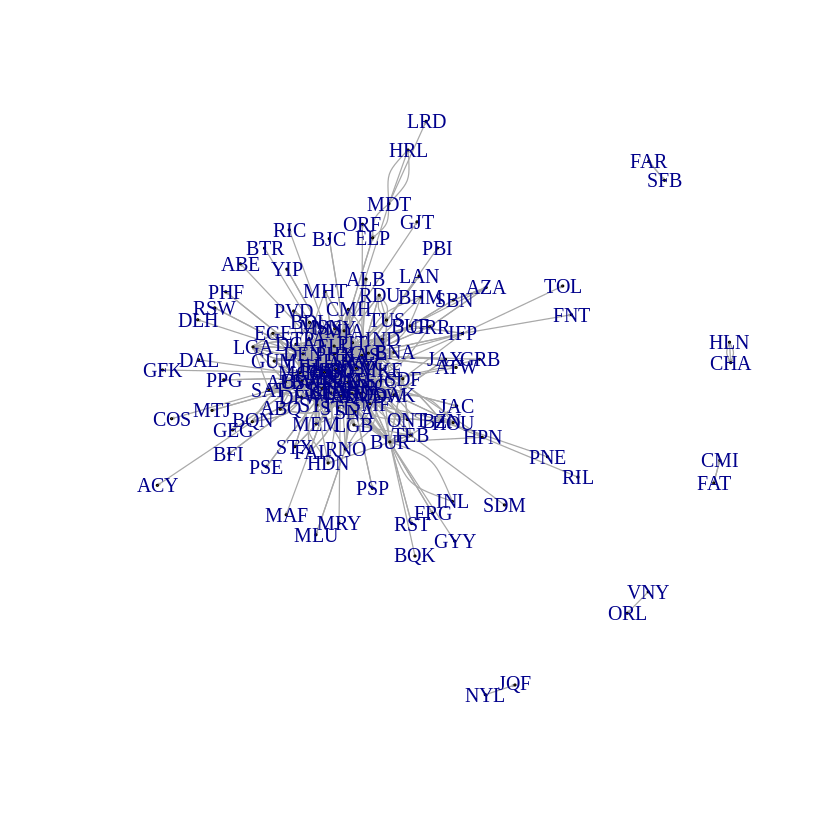

In [61]:
long_hual_graph = subgraph.edges(USairports, distance_more_1500)

plot(long_hual_graph, vertex.size=0, edge.arrow.size=0.1)

In [60]:
ego(USairports, nodes = c("OAK"))

[[1]]
+ 47/755 vertices, named, from bf6202d:
 [1] OAK JFK LAS LAX GEG SFO IAD IND MSP PHL ORD MCI OKC ABQ ATL AUS DEN HOU MDW
[20] PDX PHX SAN SAT SEA SLC SMF SNA JAX BOI BUR HNL KOA OGG ONT RNO ELP PSP BLI
[39] EUG LGB BZN IDA FOE AZA BFL MRY IFP


# Visualization

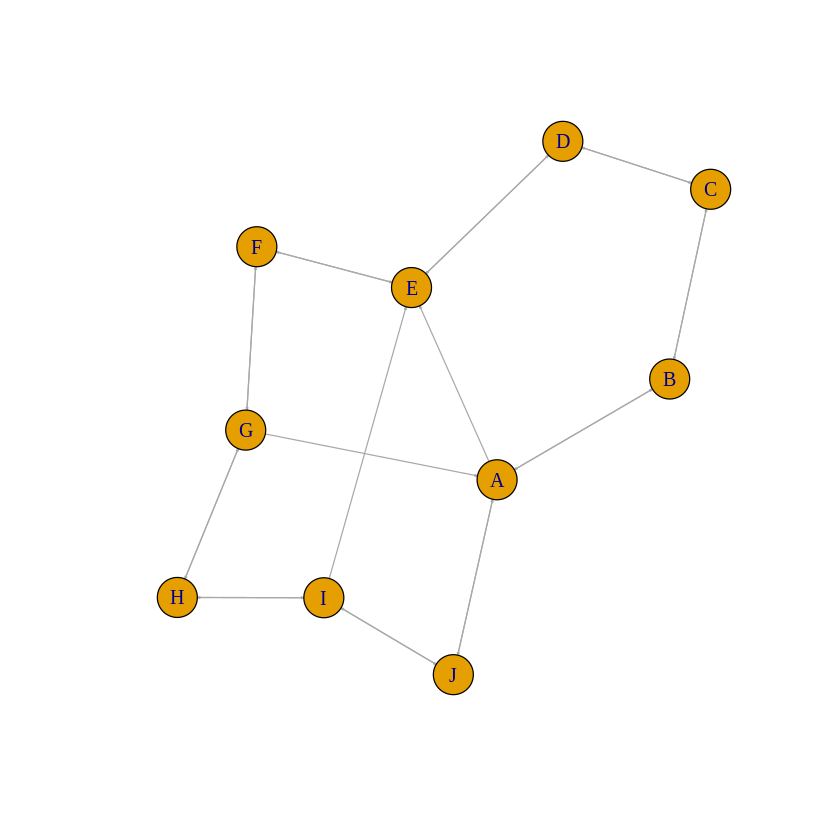

In [35]:
g <- make_ring(10, directed = TRUE, mutual = TRUE)
V(g)$name <- LETTERS[1:10]
g <- g + edges(9,5, 7,1, 1,5)
plot(g, edge.arrow.size=0.1)

## Layout

[,1]      [,2]     
[1,]  1.000000 0.0000000
[2,]  0.809017 0.5877853
[3,]  0.309017 0.9510565
[4,] -0.309017 0.9510565

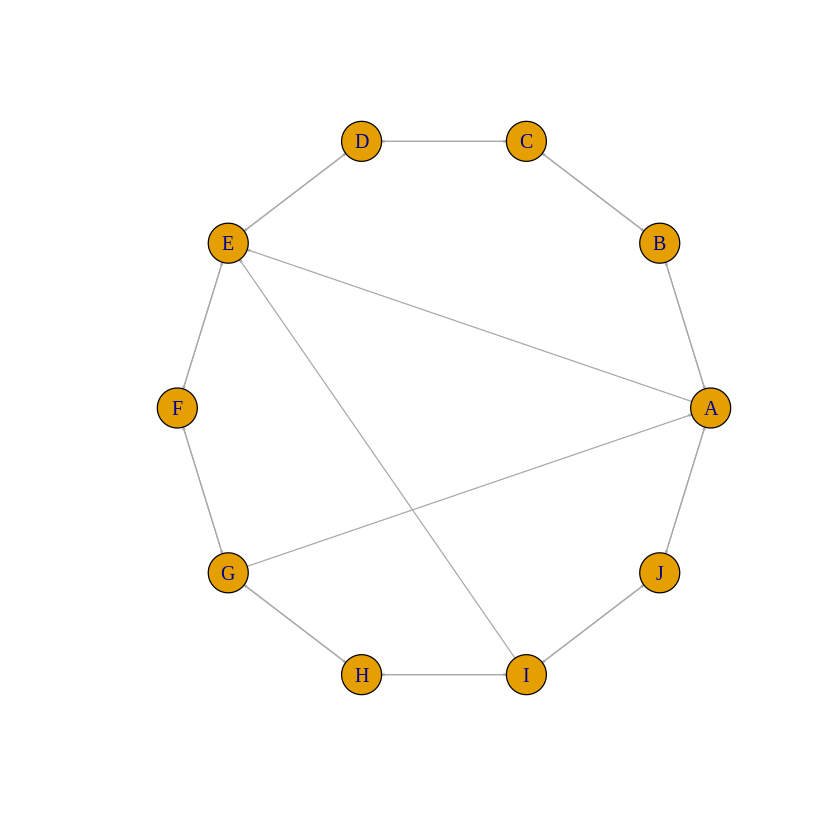

In [36]:
lo <- layout_in_circle(g)
head(lo, n = 4) # lo is a matrix of coornidates
plot(g, layout=lo, edge.arrow.size=0.1)

## Tree layout

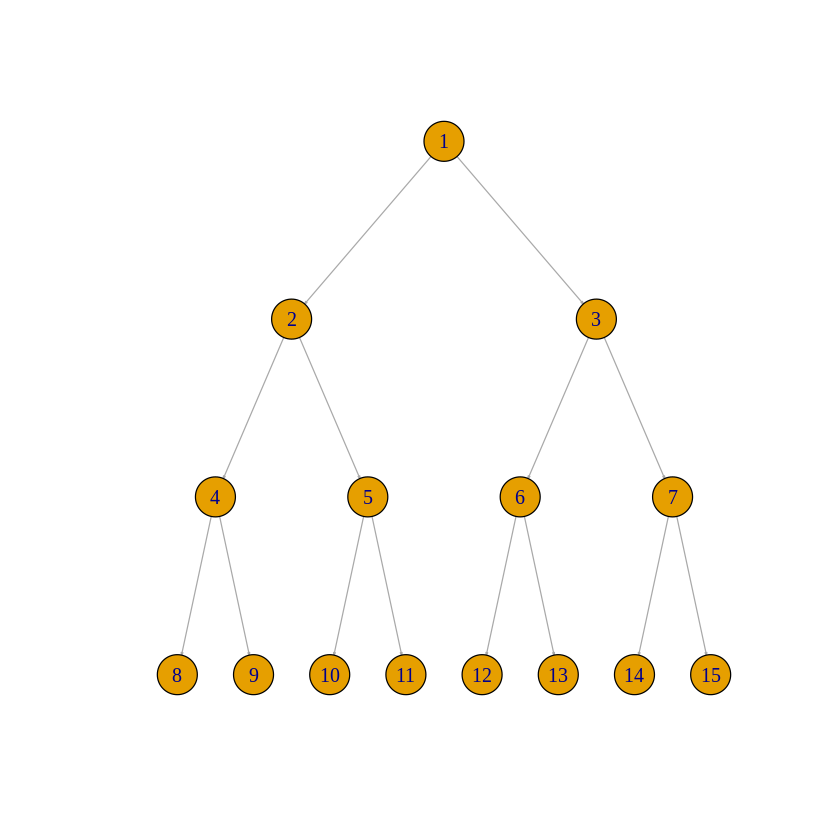

In [37]:
gTree <- make_tree(15)
plot(gTree, layout=layout_as_tree(gTree, root = 1), edge.arrow.size=0.1)

## Grid layout

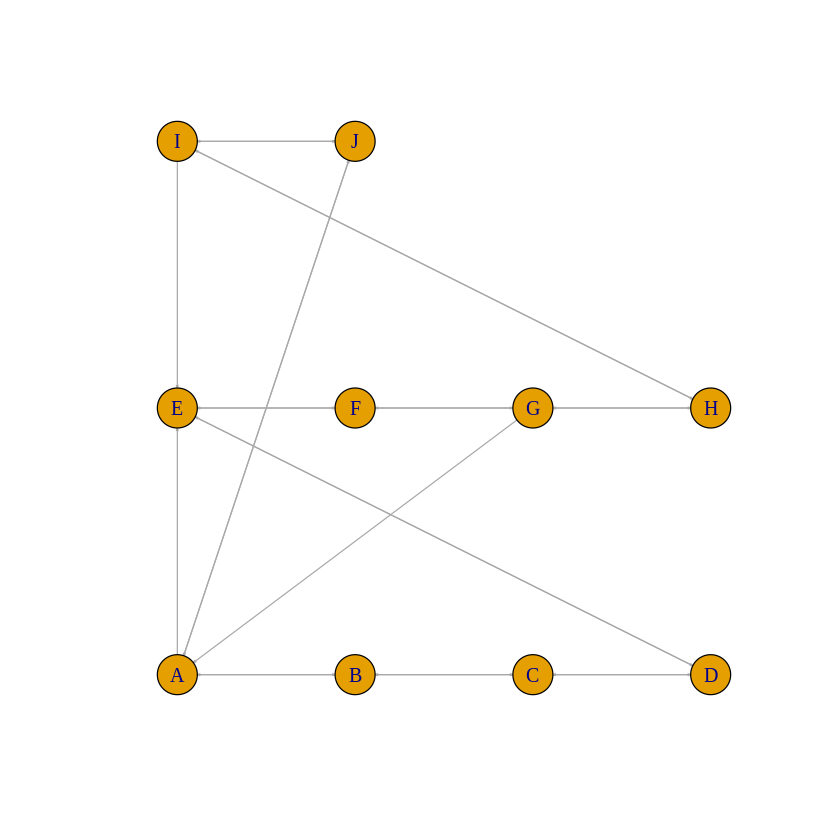

In [62]:
plot(g, layout=layout_on_grid(g), edge.arrow.size=0.1)

## Force layouts

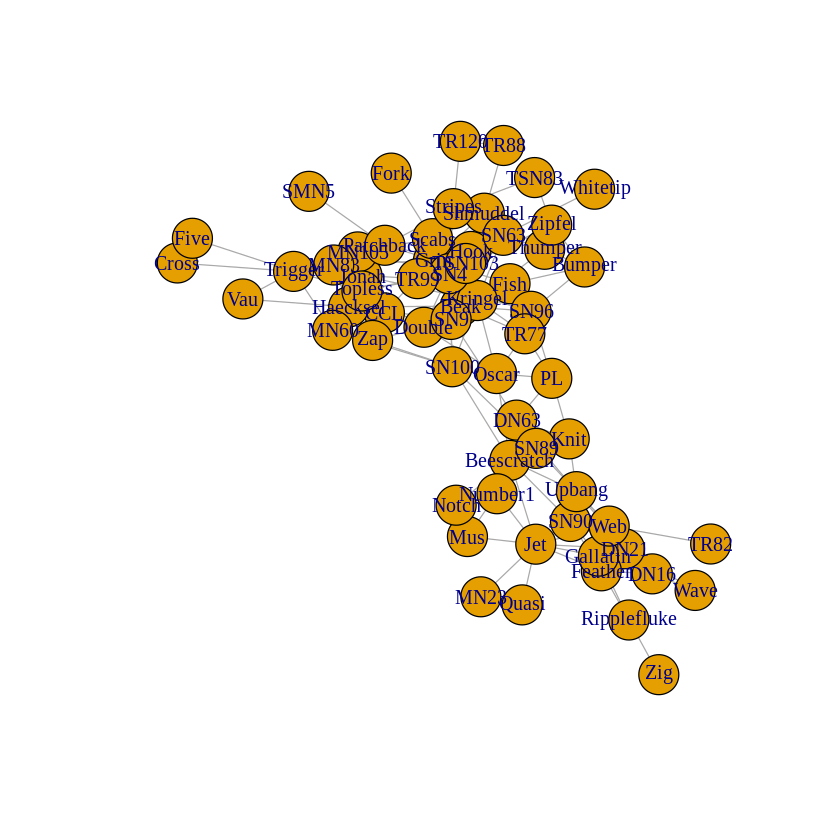

In [63]:
plot(dolphin, layout=layout_with_fr(dolphin), edge.arrow.size=0.1)

## Vertex properties

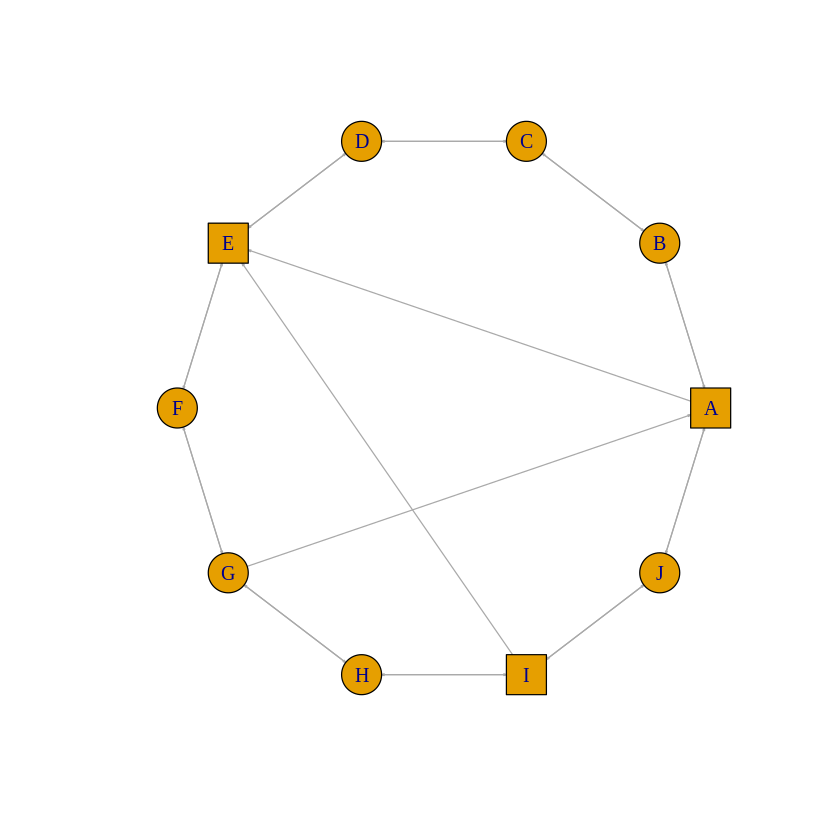

In [64]:
vowel <- V(g)$name %in% c("A","E","I","O","U") + 1
plot(g, layout=lo, vertex.shape = c("circle","square")[vowel], edge.arrow.size=0.1)

## Vertex colors and sizes

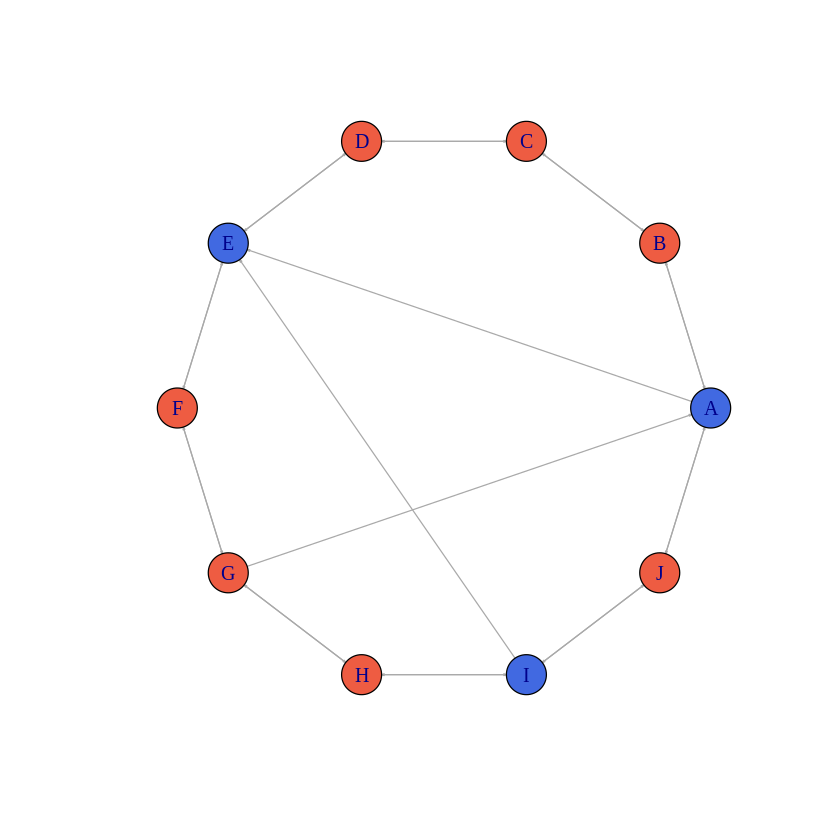

In [65]:
plot(g, layout=lo, vertex.color=c("tomato2", "royalblue")[vowel], edge.arrow.size=0.1)


## Properties using attributes

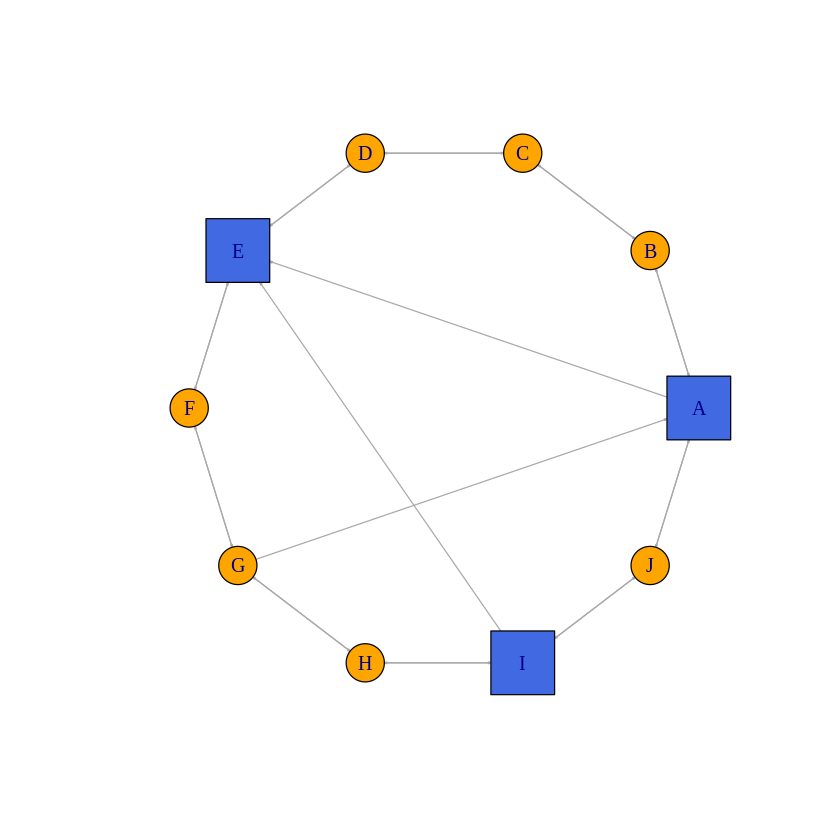

In [66]:
V(g)$shape <- "circle"
V(g)$size <- 15
V(g)$color <- "orange"
isVowel <- V(g)$name %in% c("A","E","I","O","U") 
V(g)[isVowel]$shape <- "square"
V(g)[isVowel]$color <- "royalblue"
V(g)[isVowel]$size <- 25
plot(g,layout=lo, edge.arrow.size=0.1)

## Edge properties

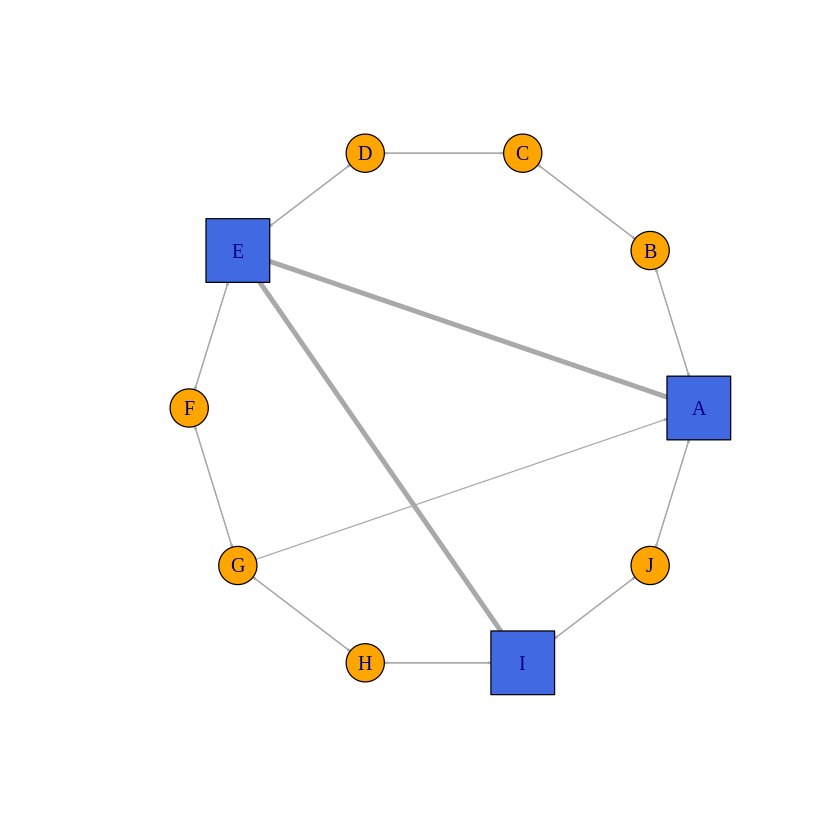

In [67]:
E(g)$width = 1
E(g)[V(g)[isVowel] %--% V(g)[isVowel]]$width <- 4
plot(g, layout=lo, edge.arrow.size=0.1)


## Curve edges

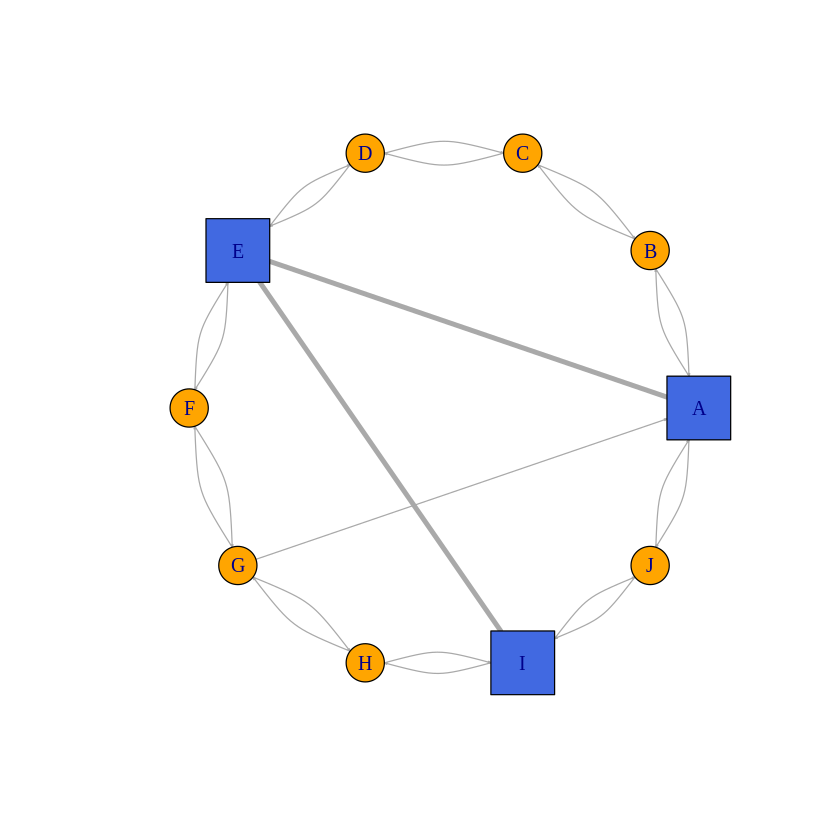

In [68]:
plot(g, layout=lo, edge.curved=0.3*which_mutual(g), edge.arrow.size=0.1)

# Descriptive Statistics

## Degree

Beak Beescratch     Bumper        CCL      Cross       DN16 
         6          8          4          3          1          4

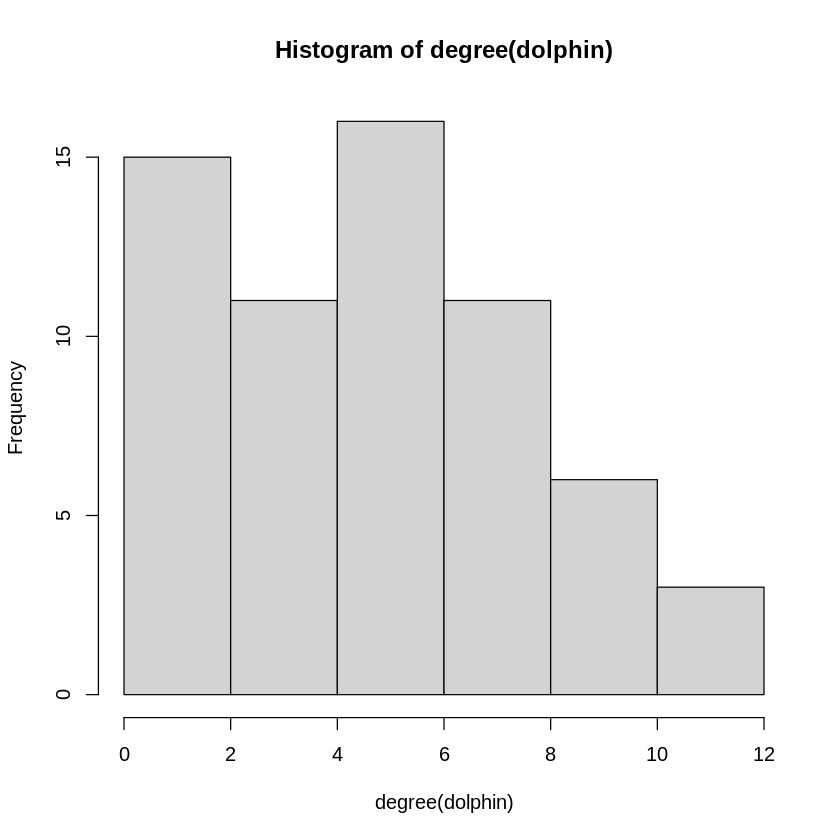

In [69]:
degDol <- degree(dolphin)
head(degDol)
hist(degree(dolphin))


## Clustering

In [70]:
g <- graph_from_literal(A--B, A--C, A--D, B--C, C--D, D--E)
transitivity(g, type="global")
transitivity(g, type="local")

[1] 0.6

[1] 0.6666667 1.0000000 0.6666667 0.3333333       NaN

## Path

In [118]:
sp <- shortest_paths(dolphin, from="Beak", to="Whitetip")
sp

$vpath
$vpath[[1]]
+ 4/62 vertices, named, from 47f6d52:
[1] Beak     Grin     SN63     Whitetip


$epath
NULL

$predecessors
NULL

$inbound_edges
NULL


## Exercise 4

In [81]:
V(dolphin)$name[degree(dolphin)==max(degree(dolphin))]

[1] "Grin"

In [115]:
transitivity(dolphin, type="local")

[1] 0.33333333 0.14285714 0.16666667 0.33333333        NaN 0.50000000
 [7] 0.53333333 0.20000000 0.26666667 0.52380952 0.40000000        NaN
[13]        NaN 0.50000000 0.25757576 0.23809524 0.60000000 0.22222222
[19] 0.52380952 0.50000000 0.13888889 0.53333333        NaN 0.33333333
[25] 0.53333333 0.66666667 0.66666667 0.40000000 0.30000000 0.25000000
[31] 0.30000000        NaN 0.33333333 0.33333333 0.30000000        NaN
[37] 0.04761905 0.23636364 0.28571429 0.00000000 0.25000000 0.60000000
[43] 0.33333333 0.23809524 0.16666667 0.30909091 0.00000000 0.40000000
[49]        NaN 0.00000000 0.23809524 0.24444444 0.33333333 0.00000000
[55] 0.38095238 0.00000000 0.00000000 0.36111111        NaN 0.30000000
[61]        NaN 0.00000000

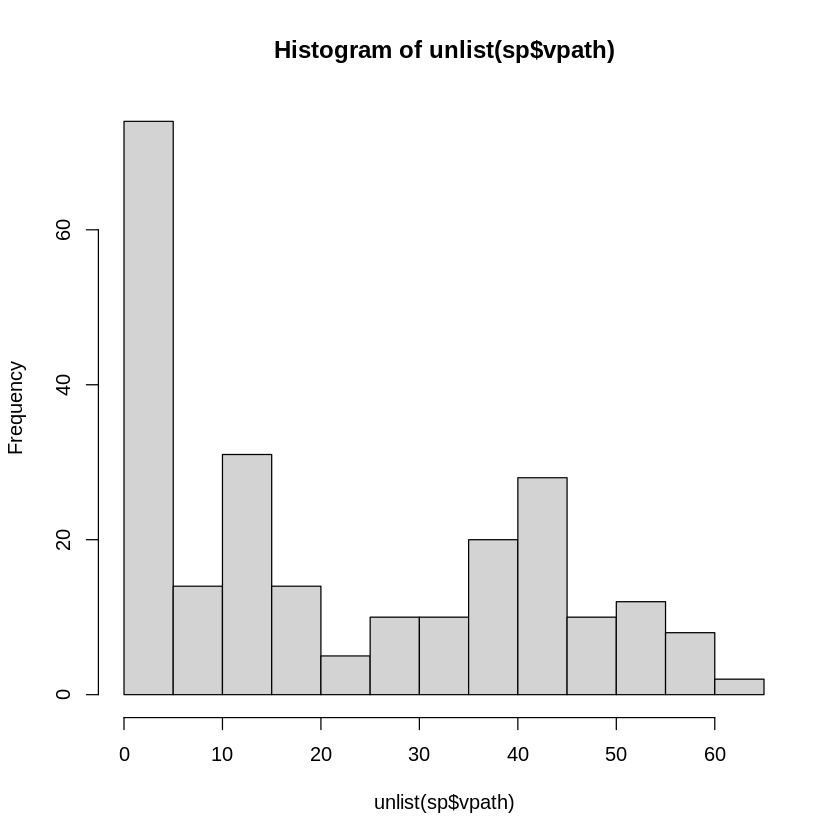

In [123]:
sp <- shortest_paths(dolphin, from=V(dolphin), to=V(dolphin))
hist(unlist(sp$vpath))

## Centrality measures

### Betweenness centrality

Warning message in disjoint_union(e1, e2):
“Duplicate vertex names in disjoint union”


A  B  C  D  E  F  G  H  I 
 0  0  0 15 16 15  0  0  0

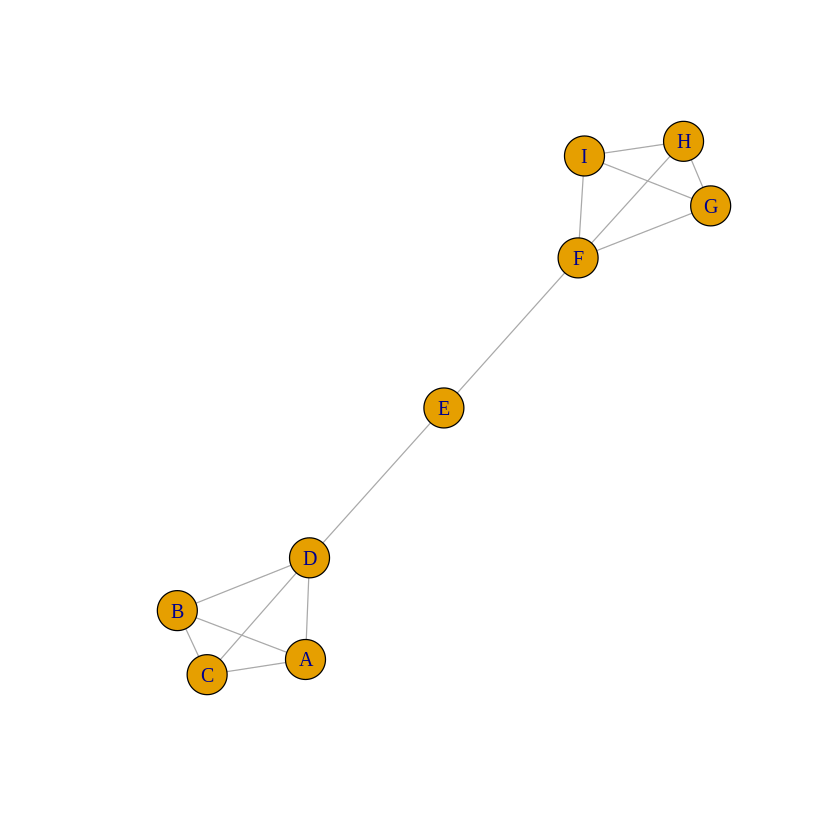

In [72]:
g <- make_full_graph(4) + vertex(1) + make_full_graph(4)
g <- g + edges(c(4,5, 5,6))
V(g)$name <- LETTERS[1:9]
plot(g, edge.arrow.size=0.1)
betweenness(g)

### Eigenvector centrality

In [73]:
ec <- eigen_centrality(g)
ec$vector

A         B         C         D         E         F         G         H 
0.8493220 0.8493220 0.8493220 1.0000000 0.6294435 1.0000000 0.8493220 0.8493220 
        I 
0.8493220

### PageRank centrality

In [74]:
pr <- page_rank(g)
pr$vector

A          B          C          D          E          F          G 
0.10721963 0.10721963 0.10721963 0.14021259 0.07625702 0.14021259 0.10721963 
         H          I 
0.10721963 0.10721963